In [10]:
import pandas as pd
from IPython.display import display
from tensorflow import keras
from tensorflow.keras import layers

In [11]:
#import datasets
red_wine = pd.read_csv('./data/red-wine.csv')

In [12]:
# Create training and validation splits
df_train = red_wine.sample(frac=0.8, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [13]:
# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_)/(max_ - min_)
df_valid = (df_valid - min_)/(max_ - min_)

In [14]:
# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']
print(X_train.shape)

(1279, 11)


In [6]:
# Build the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[11]),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='mae',)

In [8]:
# Run the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=1024,
    epochs=100,
)

Epoch 1/100
2/2 [==============================] - 1s 158ms/step - loss: 0.4513 - val_loss: 0.3510
Epoch 2/100
2/2 [==============================] - 0s 31ms/step - loss: 0.3351 - val_loss: 0.2388
Epoch 3/100
2/2 [==============================] - 0s 36ms/step - loss: 0.2243 - val_loss: 0.1603
Epoch 4/100
2/2 [==============================] - 0s 37ms/step - loss: 0.1551 - val_loss: 0.1499
Epoch 5/100
2/2 [==============================] - 0s 34ms/step - loss: 0.1512 - val_loss: 0.1718
Epoch 6/100
2/2 [==============================] - 0s 31ms/step - loss: 0.1726 - val_loss: 0.1749
Epoch 7/100
2/2 [==============================] - 0s 38ms/step - loss: 0.1746 - val_loss: 0.1562
Epoch 8/100
2/2 [==============================] - 0s 42ms/step - loss: 0.1556 - val_loss: 0.1372
Epoch 9/100
2/2 [==============================] - 0s 35ms/step - loss: 0.1377 - val_loss: 0.1317
Epoch 10/100
2/2 [==============================] - 0s 33ms/step - loss: 0.1307 - val_loss: 0.1323
Epoch 11/100
2/2 [

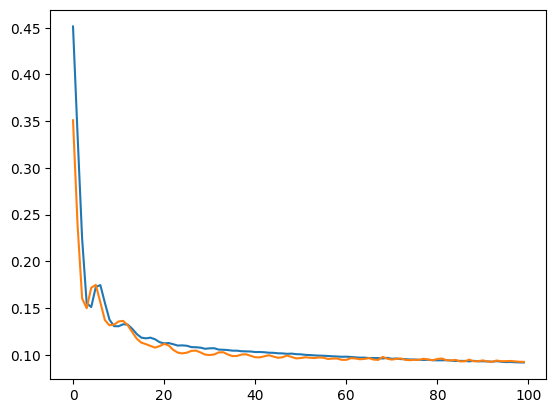

In [9]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot(); 
history_df['val_loss'].plot();